<hr style="border:4px solid pink"> </hr>


In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/bert_3.pt
/content/bert_2.pt
/content/Book1.csv
/content/train1.csv
/content/bert_1.pt
/content/bert_4.pt
/content/train.csv
/content/test.csv
/content/.config/active_config
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/logs/2021.03.25/13.38.09.835215.log
/content/.config/logs/2021.03.25/13.37.48.611688.log
/content/.config/logs/2021.03.25/13.38.27.034051.log
/content/.config/logs/2021.03.25/13.38.26.474054.log
/content/.config/logs/2021.03.25/13.38.04.266969.log
/content/.config/logs/2021.03.25/13.37.29.839683.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


<hr style="border:4px solid pink"> </hr>

<hr style="border:4px solid pink"> </hr>


    IMPORTING THE LIBRARIES


In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.pyplot as plt
import torch as nn
from sklearn.model_selection import train_test_split
from torch.nn import Dropout , Linear 

    CONFIG FILE

In [3]:
### Config File
TRAIN = '/content/train1.csv'
TEST = '/content/test.csv'
# TEST_LABEL = './test_labels.csv'
# SAMPLE = './sample_submission.csv'
EPOCHS = 2

<hr style="border:4px solid pink"> </hr>

In [4]:
train_csv = pd.read_csv(TRAIN)
test_csv = pd.read_csv(TEST)
# test_label = pd.read_csv(TEST_LABEL)
# sample_sub = pd.read_csv(SAMPLE)
train_csv.describe()
try_csv = pd.read_csv("/content/Book1.csv")

In [5]:
try_csv.head()

,comment_text
0,unmute the volume and play music


In [6]:
train_csv.head()

,ID,comment_text,settings,music,camera,editor,internet,contacts,messages,clock,recorder,calendar,weather,file manager,notes,gallery,calculator
0,00001cee341fdb12,decrease brightness and play a video on youtube,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0000247867823ef7,take a picture and edit it,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,00013b17ad220c46,edit the picture after capturing a wide angle ...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,00017563c3f7919a,unmute the volume and play music,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00017695ad8997eb,turn on dark mode and open google search,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [7]:
train_csv['settings'].unique()

array([1, 0])

In [8]:
train_csv['music'].unique()

array([1, 0])

In [9]:
train_csv['comment_text'][3]

'unmute the volume and play music'

In [10]:
train_csv['comment_text'][5]

'play music on spotify and switch on the flashlight'

<hr style="border:4px solid pink"> </hr>

    TEXT PREPROCESSING FOR BERT

In [11]:
import re
def text_preprocessing(text):
    text = re.sub(r'(@.*?)[\s]', ' ', text)
    text = re.sub(r'[0-9]+' , '' ,text)
    text = re.sub(r'\s([@][\w_-]+)', '', text).strip()
    text = re.sub(r'&amp;', '&', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.replace("#" , " ")
    encoded_string = text.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    return decode_string

In [12]:
print('Original sentence :'  , train_csv['comment_text'][3])
print('Processed Sentence :' , text_preprocessing(train_csv['comment_text'][3]))

Original sentence : unmute the volume and play music
Processed Sentence : unmute the volume and play music


In [13]:
test_csv.head()

,id,comment_text
0,00001cee341fdb12,decrease brightness and play a video on youtube
1,0000247867823ef7,take a picture and edit it
2,00013b17ad220c46,edit the picture after capturing a wide angle ...
3,00017563c3f7919a,unmute the volume and play music
4,00017695ad8997eb,turn on dark mode and open google search


In [14]:
print('Original : ' ,test_csv['comment_text'][2])
print('Processed :' , text_preprocessing(test_csv['comment_text'][2]))

Original :  edit the picture after capturing a wide angle shot
Processed : edit the picture after capturing a wide angle shot


In [15]:
# test_label.head()

<hr style="border:4px solid pink"> </hr>


    ANALYZING THE MOST COMMON WORD IN OUR TRAIN DATASET USING WORDCLOUD

In [16]:
X = []
for items in train_csv['comment_text']:
    X.append(text_preprocessing(items))

In [17]:
commonWord = ' '.join(X)

In [18]:
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(commonWord)

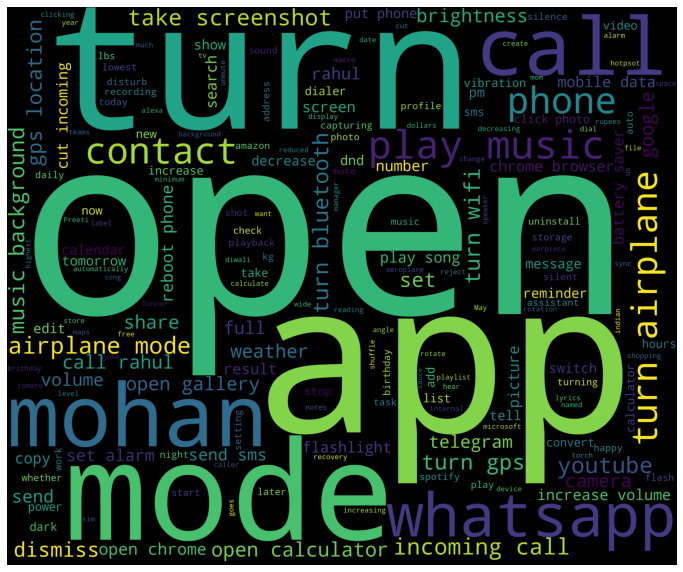

In [19]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<hr style="border:4px solid pink"> </hr>

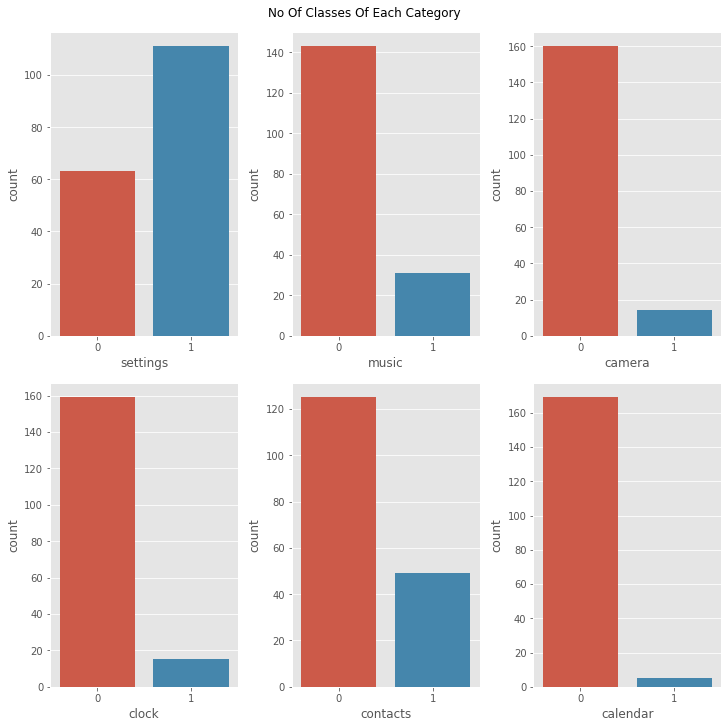

In [20]:
fig , axes = plt.subplots(2,3,figsize = (10,10), constrained_layout = True)
sns.countplot(ax=axes[0,0],x='settings',data=train_csv )
sns.countplot(ax=axes[0,1],x='music',data=train_csv)
sns.countplot(ax=axes[0,2],x='camera',data=train_csv)
sns.countplot(ax = axes[1,0],x='clock',data=train_csv)
sns.countplot(ax=axes[1,1],x='contacts',data=train_csv)
sns.countplot(ax=axes[1,2],x='calendar',data=train_csv)
plt.suptitle('No Of Classes Of Each Category')
plt.show() 

<hr style="border:4px solid pink"> </hr>

    SPLITTING YOUR TRAIN DATA INTO TRAIN AND VALIDATION SET FOR TRAINING

In [21]:
X = train_csv.comment_text.values

Y = train_csv.settings.values
y2 = train_csv.music.values
y3 = train_csv.contacts.values
y4 = train_csv.calendar.values
y5 = train_csv.clock.values

# Y = np.append([y1],[y2],axis=0)
# Y = np.append(Y,[y3],axis=0)
# Y = np.append(Y,[y4],axis=0)
# Y = np.append(Y,[y5],axis=0)
# Y = Y.transpose()

X1_train, X1_val, y1_train, y1_val =\
    train_test_split(X, Y, test_size=0.1, random_state=2021)

X2_train, X2_val, y2_train, y2_val =\
    train_test_split(X, y2, test_size=0.1, random_state=2021)

X3_train, X3_val, y3_train, y3_val =\
    train_test_split(X, y3, test_size=0.1, random_state=2021)

X4_train, X4_val, y4_train, y4_val =\
    train_test_split(X, y4, test_size=0.1, random_state=2021)

X5_train, X5_val, y5_train, y5_val =\
    train_test_split(X, y5, test_size=0.1, random_state=2021)

In [22]:
print(type(Y))
print(Y.shape)
print(X.shape)
print(Y) 

<class 'numpy.ndarray'>
(174,)
(174,)
[1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]


    SETTING UP THE GPU IF POSSIBLE

In [23]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


<hr style="border:4px solid pink"> </hr>

    Installing the Hugging Face Library

In [24]:
!pip install transformers

    TRANSFORMERS 
    State-of-the-art Natural Language Processing for PyTorch and TensorFlow 2.0 

**🤗 Transformers provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation, etc in 100+ languages. Its aim is to make cutting-edge NLP easier to use for everyone.**

**🤗 Transformers provides APIs to quickly download and use those pretrained models on a given text, fine-tune them on your own datasets then share them with the community on our model hub. At the same time, each python module defining an architecture can be used as a standalone and modified to enable quick research experiments.**

**🤗 Transformers is backed by the two most popular deep learning libraries, PyTorch and TensorFlow, with a seamless integration between them, allowing you to train your models with one then load it for inference with the other.**


[LINK TO GITHUB REPO OF THE TRANSFORMERS](http://github.com/huggingface/transformers)

In [25]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
def preprocessing_for_bert(data):
    input_ids = []
    attention_masks = []
 
    # For every sentence...
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            truncation = True,
            return_attention_mask=True      # Return attention mask
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [26]:
MAX_LEN = 300

token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train1_inputs, train1_masks = preprocessing_for_bert(X1_train)
val1_inputs, val1_masks = preprocessing_for_bert(X1_val)

train2_inputs, train2_masks = preprocessing_for_bert(X2_train)
val2_inputs, val2_masks = preprocessing_for_bert(X2_val)

train3_inputs, train3_masks = preprocessing_for_bert(X3_train)
val3_inputs, val3_masks = preprocessing_for_bert(X3_val)

train4_inputs, train4_masks = preprocessing_for_bert(X4_train)
val4_inputs, val4_masks = preprocessing_for_bert(X4_val)

train5_inputs, train5_masks = preprocessing_for_bert(X5_train)
val5_inputs, val5_masks = preprocessing_for_bert(X5_val)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  decrease brightness and play a video on youtube
Token IDs:  [101, 9885, 18295, 1998, 2377, 1037, 2678, 2006, 7858, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

<hr style="border:4px solid pink"> </hr>


In [27]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train1_labels = torch.tensor(y1_train)
val1_labels = torch.tensor(y1_val)

train2_labels = torch.tensor(y2_train)
val2_labels = torch.tensor(y2_val)

train3_labels = torch.tensor(y3_train)
val3_labels = torch.tensor(y3_val)

train4_labels = torch.tensor(y4_train)
val4_labels = torch.tensor(y4_val)

train5_labels = torch.tensor(y5_train)
val5_labels = torch.tensor(y5_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train1_data = TensorDataset(train1_inputs, train1_masks, train1_labels)
train1_sampler = RandomSampler(train1_data)
train1_dataloader = DataLoader(train1_data, sampler=train1_sampler, batch_size=batch_size)

train2_data = TensorDataset(train1_inputs, train2_masks, train2_labels)
train2_sampler = RandomSampler(train2_data)
train2_dataloader = DataLoader(train2_data, sampler=train2_sampler, batch_size=batch_size)

train3_data = TensorDataset(train3_inputs, train3_masks, train3_labels)
train3_sampler = RandomSampler(train3_data)
train3_dataloader = DataLoader(train3_data, sampler=train3_sampler, batch_size=batch_size)

train4_data = TensorDataset(train4_inputs, train4_masks, train4_labels)
train4_sampler = RandomSampler(train4_data)
train4_dataloader = DataLoader(train4_data, sampler=train4_sampler, batch_size=batch_size)

train5_data = TensorDataset(train5_inputs, train5_masks, train5_labels)
train5_sampler = RandomSampler(train5_data)
train5_dataloader = DataLoader(train5_data, sampler=train5_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val1_data = TensorDataset(val1_inputs, val1_masks, val1_labels)
val1_sampler = SequentialSampler(val1_data)
val1_dataloader = DataLoader(val1_data, sampler=val1_sampler, batch_size=batch_size)

val2_data = TensorDataset(val2_inputs, val2_masks, val2_labels)
val2_sampler = SequentialSampler(val2_data)
val2_dataloader = DataLoader(val2_data, sampler=val2_sampler, batch_size=batch_size)

val3_data = TensorDataset(val3_inputs, val3_masks, val3_labels)
val3_sampler = SequentialSampler(val3_data)
val3_dataloader = DataLoader(val3_data, sampler=val3_sampler, batch_size=batch_size)

val4_data = TensorDataset(val4_inputs, val4_masks, val4_labels)
val4_sampler = SequentialSampler(val4_data)
val4_dataloader = DataLoader(val4_data, sampler=val4_sampler, batch_size=batch_size)

val5_data = TensorDataset(val5_inputs, val5_masks, val5_labels)
val5_sampler = SequentialSampler(val5_data)
val5_dataloader = DataLoader(val5_data, sampler=val5_sampler, batch_size=batch_size)

    The BERT model has 201 different named parameters.

    ==== Embedding Layer ====

    bert.embeddings.word_embeddings.weight                  (30522, 768)
    bert.embeddings.position_embeddings.weight                (512, 768)
    bert.embeddings.token_type_embeddings.weight                (2, 768)
    bert.embeddings.LayerNorm.weight                              (768,)
    bert.embeddings.LayerNorm.bias                                (768,)

    ==== First Transformer ====

    bert.encoder.layer.0.attention.self.query.weight          (768, 768)
    bert.encoder.layer.0.attention.self.query.bias                (768,)
    bert.encoder.layer.0.attention.self.key.weight            (768, 768)
    bert.encoder.layer.0.attention.self.key.bias                  (768,)
    bert.encoder.layer.0.attention.self.value.weight          (768, 768)
    bert.encoder.layer.0.attention.self.value.bias                (768,)
    bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
    bert.encoder.layer.0.attention.output.dense.bias              (768,)
    bert.encoder.layer.0.attention.output.LayerNorm.weight        (768,)
    bert.encoder.layer.0.attention.output.LayerNorm.bias          (768,)
    bert.encoder.layer.0.intermediate.dense.weight           (3072, 768)
    bert.encoder.layer.0.intermediate.dense.bias                 (3072,)
    bert.encoder.layer.0.output.dense.weight                 (768, 3072)
    bert.encoder.layer.0.output.dense.bias                        (768,)
    bert.encoder.layer.0.output.LayerNorm.weight                  (768,)
    bert.encoder.layer.0.output.LayerNorm.bias                    (768,)

    ==== Output Layer ====

    bert.pooler.dense.weight                                  (768, 768)
    bert.pooler.dense.bias                                        (768,)
    classifier.weight                                           (2, 768)
    classifier.bias                                                 (2,)

In [28]:
%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        # self.LSTM = nn.LSTM(D_in,D_in,bidirectional=True)
        # self.clf = nn.Linear(D_in*2,2)

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            # nn.LSTM(D_in,D_in)
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]
        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [29]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train1_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [30]:
import random
import time

# loss_fn = nn.MultiLabelSoftMarginLoss()
# loss_fn = nn.BCEWithLogitsLoss()
loss_fn = nn.CrossEntropyLoss() 
def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train1(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer1.step()
            scheduler1.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def train2(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer2.step()
            scheduler2.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def train3(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer3.step()
            scheduler3.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")

def train4(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer4.step()
            scheduler4.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")

def train5(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer5.step()
            scheduler5.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")

def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [31]:
set_seed(42)    # Set seed for reproducibility
# bert_classifier1,  optimizer1, scheduler1 = initialize_model(epochs=2)
# bert_classifier2,  optimizer2, scheduler2 = initialize_model(epochs=2)
# bert_classifier3,  optimizer3, scheduler3 = initialize_model(epochs=2)
# bert_classifier4,  optimizer4, scheduler4 = initialize_model(epochs=2)
bert_classifier5,  optimizer5, scheduler5 = initialize_model(epochs=2)

# train1(bert_classifier1, train1_dataloader, val1_dataloader, epochs=2, evaluation=True)

# train2(bert_classifier2, train2_dataloader, val2_dataloader, epochs=2, evaluation=True)

# train3(bert_classifier3, train3_dataloader, val3_dataloader, epochs=2, evaluation=True)

# train4(bert_classifier4, train4_dataloader, val4_dataloader, epochs=2, evaluation=True)

train5(bert_classifier5, train5_dataloader, val5_dataloader, epochs=2, evaluation=True)

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |    4    |   0.403638   |     -      |     -     |   7.88   
----------------------------------------------------------------------
   1    |    -    |   0.403638   |  0.094041  |  100.00   |   8.25   
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |    4    |   0.235607   |     -      |     -     |   8.06   
----------------------------------------------------------------------
   2    |    -    |   0.235607   |  0.075923  |  100.00   |   8.44   
----------------------------------------------------------------------


Training complete!


In [32]:
import torch.nn.functional as F

In [33]:
def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    # probs = F.softmax(all_logits, dim=1).cpu().numpy()
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [34]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

<hr style="border:4px solid pink"> </hr>


    AUC SCORE - 0.9853

AUC: 1.0000
Accuracy: 83.33%


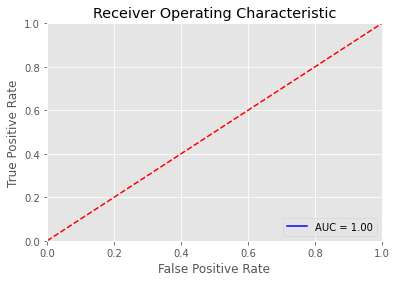

In [35]:
probs = bert_predict(bert_classifier2, val2_dataloader)
evaluate_roc(probs, y2_val)

In [35]:
torch.save(bert_classifier5.state_dict(),"bert_5.pt")  # save weights


In [36]:
# Setting Classifier
bert_classifier1 = BertClassifier()
bert_classifier1.load_state_dict(torch.load("/content/bert_1.pt"))
bert_classifier1 = bert_classifier1.to(device)

# Music Classifier
bert_classifier2 = BertClassifier()
bert_classifier2.load_state_dict(torch.load("/content/bert_2.pt"))
bert_classifier2 = bert_classifier2.to(device)

# contacts Classifier
bert_classifier3 = BertClassifier()
bert_classifier3.load_state_dict(torch.load("/content/bert_3.pt"))
bert_classifier3 = bert_classifier3.to(device)

# calendar Classfier
bert_classifier4 = BertClassifier()
bert_classifier4.load_state_dict(torch.load("/content/bert_4.pt"))
bert_classifier4 = bert_classifier4.to(device)

# clock Classifier
bert_classifier5 = BertClassifier()
bert_classifier5.load_state_dict(torch.load("/content/bert_5.pt"))
bert_classifier5 = bert_classifier5.to(device)

In [50]:
sentence = np.array(['unmute the volume and play music'])
test_inputs, test_masks = preprocessing_for_bert(sentence) 
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset) 
test_dataloader = DataLoader(test_dataset)
# probs = bert_predict(model,test_dataloader)
probs1 = bert_predict(bert_classifier1,test_dataloader) # Settings
probs2 = bert_predict(bert_classifier2,test_dataloader) # Music
probs3 = bert_predict(bert_classifier3,test_dataloader) # Contacts
probs4 = bert_predict(bert_classifier4,test_dataloader) # Calendar
probs5 = bert_predict(bert_classifier5,test_dataloader) # Clock

# print(type(probs))
# Settings Music Contacts Calendar Clock
print(probs1[:,1],probs2[:,1],probs3[:,1],probs4[:,1],probs5[:,1])
labels = ["Settings","Music","Contacts","Calendar","Clock"]
print(labels)
op = [probs1[:,1],probs2[:,1],probs3[:,1],probs4[:,1],probs5[:,1]]
final = dict(zip(labels,op))

# sorted according to probability
final  = sorted(final.items(),key=lambda x:x[1],reverse=True)
# All Probabilities 
# print(final)
# only top 2 categories
print("Predicted Categories: "+str(final[0][0]),str(final[1][0]))

# According to Threshold
thresh = 0.6
for i in range(len(final)):
  if(final[i][1]>=thresh):
    print(final[i][0],end="")

[0.7613474] [0.27742645] [0.27426723] [0.04197424] [0.05205144]
['Settings', 'Music', 'Contacts', 'Calendar', 'Clock']
Predicted Categories: Settings Music
Settings

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


<hr style="border:4px solid pink"> </hr>
